# Solution Exponential Integrate and Fire Neuron

first name: Rémy

last name: SUN

sciper: 

date: ...

*Your teammate*

first name of your teammate: Emmanuel

last name of your teammate: Peyronnet

sciper of your teammate: 278755


Note: You are allowed to discuss the concepts with your class mates. You are not allowed to share code. You have to understand every line of code you write in this notebook. We will ask you questions about your submission during a fraud detection session during the last week of the semester.


** Submission **

Rename this notebook to Ex3_FirstName_LastName_Sciper.ipynb and upload that single file on moodle before the deadline.

** Link to the exercise **

<http://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/exponential-integrate-and-fire.html>

## Exercise 3, getting started

nr of spikes: 7


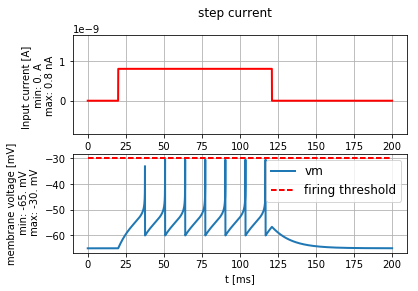

In [1]:
% matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import neurodynex.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex.tools import plot_tools, input_factory


input_current = input_factory.get_step_current(
    t_start=20, t_end=120, unit_time=b2.ms, amplitude=0.8 * b2.namp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, simulation_time=200*b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current", 
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

## 3.1 Rehobase Threshold

The *intrinsic firing threshold* seems to be well below -30 mV.
Therefore, the time the neuron would need to reach 10 mV would not be noticeably longer
than the one needed to reach -30 mV.
It is expected that the number of spikes observed and the graph *won't* change, although the growth of the spikes might become to steep to be properly displayed by python.

#### Our observations **match** this theoretical answer.

In [12]:
import brian2 as b2
import neurodynex.exponential_integrate_fire.exp_IF as exp_IF

I_rh = (exp_IF.RHEOBASE_THRESHOLD_v_rh - exp_IF.V_REST - exp_IF.SHARPNESS_delta_T) / exp_IF.MEMBRANE_RESISTANCE_R 
print(I_rh)

0.4 nA


nr of spikes: 1


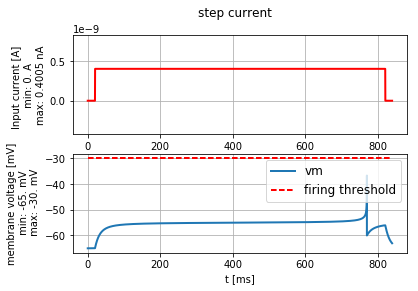

In [17]:
% matplotlib inline
import brian2 as b2
import neurodynex.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex.tools import plot_tools, input_factory


# code here: 
# inject a current for 200ms. Set the maximal amplitude such that the neuron does NOT spike.
# plot the current and the voltage.

input_current = input_factory.get_step_current(
    t_start=20, t_end=820, unit_time=b2.ms, amplitude=I_rh)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, simulation_time=840*b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current", 
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

## 3.2 Strength - Duration Curve

nr of spikes: 1


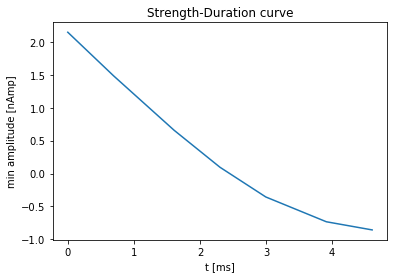

In [4]:
# follow the instructions, insert your code here.
% matplotlib inline
import brian2 as b2
import numpy as np
import matplotlib.pyplot as plt
import neurodynex.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex.tools import plot_tools, input_factory

i=6  #change i and find the value that goes into min_amp
durations = [1,   2,    5,  10,   20,   50, 100]
min_amp =   [8.58, 4.42,1.93, 1.10, .70, .48, 0.424]

t=durations[i]
I_amp = min_amp[i]*b2.namp
title_txt = "I_amp={}, t={}".format(I_amp, t*b2.ms)

input_current = input_factory.get_step_current(t_start=10, t_end=10+t-1, unit_time=b2.ms, amplitude=I_amp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(I_stim=input_current, simulation_time=(t+20)*b2.ms)

#plot_tools.plot_voltage_and_current_traces(state_monitor, input_current,
 #                                          title=title_txt, firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike,
  #                                        legend_location=2)
print("nr of spikes: {}".format(spike_monitor.count[0]))

plt.plot(np.log(durations), np.log(min_amp))
plt.title("Strength-Duration curve")
plt.xlabel("t [ms]")
plt.ylabel("min amplitude [nAmp]")

The strength of the signal decreases exponentially with duration

### 3.2 Discussion of the strength-duration curve
Inverse function


## 3.3 Quadratic Integrate and Fire neuron
This exercise is not available online. All information is given here.

3.3.1 Read the book chapter about the quadratic integrate and fire neuron
http://neuronaldynamics.epfl.ch/online/Ch5.S3.html

3.3.2 Implement the quadratic integrate and fire neuron in Brian2:

* Follow the [source]-link in the documentation to get the Python source code of the exponential integrate and fire neuron. http://neuronaldynamics-exercises.readthedocs.io/en/latest/modules/neurodynex.exponential_integrate_fire.html
* Find the one function that implements the exponential LIF. Copy that function into this notebook. Rename the function, change it's parameters and modify the dynamics from the exponential to the quadratic equation (Equation 5.16 in the book).

3.3.3 Call your function: 
As above, inject a current into your neuron and plot the response.

3.3.4 Approximate the exponential model
* The quadratic model has three parameters: a0, v_rest and vc (note that this v_rest is different from the v_rest of the exponential model). They can be chosen such that the quadratic model approximates the exponential model. Read the box "Example: Approximating the exponential integrate-and-fire" in chapter http://neuronaldynamics.epfl.ch/online/Ch5.S3.html and make sure you understand figure 5.8.
* On paper, find the equations that express the parameters a0, v_rest and vc (in terms of the parameters of the exponential model) such that the two models are matched (in value, slope and curvature) at the rheobase threshold.
* In code, compute the values of a0, v_rest and vc using the values provided in the exp_IF module.

3.3.5 Simulate the quadratic- and the exponential model
* Inject the same current into an exponential- and into your (matched) quadratic model. Set the current duration to 1 second and the amplitude to I_Rh + 0.030 * b2.namp  (I_Rh as computed in exercise 3.1). Simulate for 1 second and plot the voltage responses.

3.3.6 Discuss your observation


(<matplotlib.axes._subplots.AxesSubplot at 0x7f7f0b19bd90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7f095cebd0>)

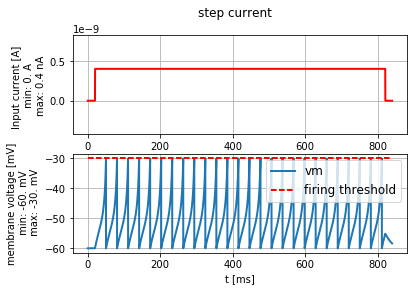

In [19]:
import neurodynex.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex.tools import plot_tools, input_factory
import brian2 as b2

# copy the simulation function here and modify it

# default values.
MEMBRANE_TIME_SCALE_tau = 12.0 * b2.ms
MEMBRANE_RESISTANCE_R = 20.0 * b2.Mohm
V_REST = -65.0 * b2.mV
V_RESET = -60.0 * b2.mV
RHEOBASE_THRESHOLD_v_rh = -55.0 * b2.mV
SHARPNESS_delta_T = 2.0 * b2.mV

# a technical threshold to tell the algorithm when to reset vm to v_reset
FIRING_THRESHOLD_v_spike = -30. * b2.mV

def simulate_quadratic_IF_neuron(
        a_0,
        v_c,
        v_rest,
        tau=MEMBRANE_TIME_SCALE_tau,
        R=MEMBRANE_RESISTANCE_R,
        v_reset=V_RESET,
        v_spike=FIRING_THRESHOLD_v_spike,
        I_stim=input_factory.get_zero_current(),
        simulation_time=200 * b2.ms):
    """
    Implements the dynamics of the exponential Integrate-and-fire model

    Args:
        tau (Quantity): Membrane time constant
        R (Quantity): Membrane resistance
        v_rest (Quantity): Resting potential
        v_reset (Quantity): Reset value (vm after spike)
        v_rheobase (Quantity): Rheobase threshold
        v_spike (Quantity) : voltage threshold for the spike condition
        delta_T (Quantity): Sharpness of the exponential term
        I_stim (TimedArray): Input current
        simulation_time (Quantity): Duration for which the model is simulated

    Returns:
        (voltage_monitor, spike_monitor):
        A b2.StateMonitor for the variable "v" and a b2.SpikeMonitor
    """

    eqs = """
    dv/dt = (a_0*(v-v_rest)*(v-v_c) + R * I_stim(t,i))/(tau) : volt
    """
    neuron = b2.NeuronGroup(1, model=eqs, reset="v=v_reset", threshold="v>v_spike", method="euler")
    neuron.v = v_rest
    # monitoring membrane potential of neuron and injecting current
    voltage_monitor = b2.StateMonitor(neuron, ["v"], record=True)
    spike_monitor = b2.SpikeMonitor(neuron)

    # run the simulation
    net = b2.Network(neuron, voltage_monitor, spike_monitor)
    net.run(simulation_time)

    return voltage_monitor, spike_monitor

input_current = input_factory.get_step_current(
    t_start=20, t_end=820, unit_time=b2.ms, amplitude=I_rh)

state_monitor, spike_monitor = simulate_quadratic_IF_neuron(1./(10. * b2.mV), -50. * b2.mV,-60. * b2.mV,
    I_stim=input_current, simulation_time=840*b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current", 
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)

In [8]:
# 3.3.4 Approximate the exponential model (solve it on paper, use the final expressions here)
V_rh = exp_IF.RHEOBASE_THRESHOLD_v_rh

A_0 = 1./ (2*exp_IF.SHARPNESS_delta_T)
print(A_0)

radius = np.sqrt((V_rh - exp_IF.V_REST - exp_IF.SHARPNESS_delta_T)/A_0)

V_rest = V_rh - radius
print(V_rest)
V_c = V_rh + radius 
print(V_c)

250. m^-2 kg^-1 s^3 A
-60.65685425 mV
-49.34314575 mV


(<matplotlib.axes._subplots.AxesSubplot at 0x7f7f0a7e15d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7f05f124d0>)

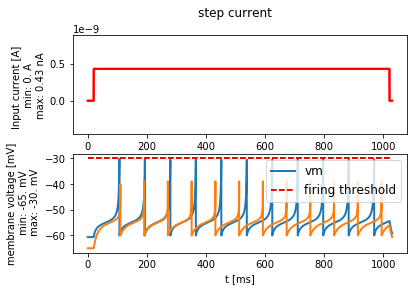

In [18]:
# 3.3.5 Simulate the quadratic- and the exponential model

input_current = input_factory.get_step_current(
    t_start=20, t_end=1020, unit_time=b2.ms, amplitude=I_rh + 0.030 * b2.namp)

state_monitor, spike_monitor = simulate_quadratic_IF_neuron(A_0, V_c,V_rest,
    I_stim=input_current, simulation_time=1030*b2.ms)

state_monitor1, spike_monitor1 = exp_IF.simulate_exponential_IF_neuron(
   I_stim=input_current, simulation_time=1030*b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current", 
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)

plot_tools.plot_voltage_and_current_traces(
    state_monitor1, input_current,title="step current", 
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)

## 3.3.6 Discuss your observation

Explain your observations here. Qualitatively compare the voltage traces of the exponential- and the quadratic model. Is the number of spikes the same for the two models?

The quadratic and exponential model are more or less aligned for the first few spikes. However, since the exponential model has much steeper curve past the rheobase (observable from the fact it cannot be plotted),  the exponential current causes slightly faster spikes, which in turn allows it to spike a little more.
The *exponential* current spikes **twelve** times as opposed to **eleven** times for the *quadratic* model